# Ballistics without friction, or, what angle should the barrel be elevated?

The target is at position (s_x, s_y) and the muzzle velocity is v

A ballistic trajectory with initial velocity $v$ and initial angle $\theta$, displacement in x and y $s_x$ and $s_y$ can be modelled like this.

$$ t = \frac {s_x} {v \cos \theta } $$

$$ s_y = v \sin(\theta) t + \frac 1 2 a t^2 $$

Eliminate time with substitution

$$ s_y = s_x \tan \theta + \frac{a {s_x}^2 }{ 2 v^2 \cos^2\theta} $$

Turn all the trig functions into tangent functions

$$  = s_x \tan \theta + \frac{a {s_x}^2}{ 2 v^2 } (1-\tan^2\theta) $$

The angle can be found with the quadratic formula.

$$ \tan\theta = \frac { -s_x \pm \sqrt{{s_x}^2 - 4 \alpha (\alpha-s_y)}} {2\alpha} \qquad \alpha = \frac{a {s_x}^2}{ 2 v^2 } $$



angle, time: 52.18815696937734 15.991511122188697
angle, time: 38.38478172830616 12.50726077240397


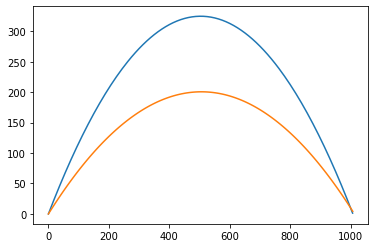

In [123]:
from math import *
import matplotlib.pyplot as plt

v = 102

s_x = 1000
s_y = 10
a = -10

alpha = a*s_x**2 / (2*v**2)

if s_x**2 - 4*alpha*(alpha-s_y) < 0:
    print("Error: Velocity too low to reach target")
    
thetas = [
    atan( -s_x / (2*alpha) - sqrt(s_x**2 - 4*alpha*(alpha-s_y))/(2*alpha) ),
    atan( -s_x / (2*alpha) + sqrt(s_x**2 - 4*alpha*(alpha-s_y))/(2*alpha) )
]


for theta in thetas:
    x=[];y=[]
    t=0;dt=0.1;
    while True:
        if v*sin(theta)*t+1/2*a*t**2 < 0: 
            break
        x.append( v*cos(theta) * t )
        y.append( v*sin(theta)*t+1/2*a*t**2 )
        t+=dt
    plt.plot(x,y)

    
print("angle, time:", 180/pi*thetas[0], s_x / (v*cos(thetas[0])))
print("angle, time:", 180/pi*thetas[1], s_x / (v*cos(thetas[1])))